In [91]:
import json
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

nltk.download('punkt_tab')

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit, GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from pandas import json_normalize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alhus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [92]:
nltk.download('punkt')

with open('hack-la-24-banksy-discussions.json', 'r') as file:
    data = json.load(file)
    

df = json_normalize(data)
df.head(5)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alhus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,discussion_topic.id,discussion_topic.title,discussion_topic.message,discussion_topic.posted_at,discussion_topic.last_reply_at,discussion_topic.require_initial_post,discussion_topic.user_name,discussion_topic.user_id,discussion_topic.discussion_type,discussion_topic.allow_rating,discussion_topic.lock_at,discussion_topic.pinned,discussion_topic.replies
0,1,The Purpose of Art,I believe Banksy's art is a powerful way to ad...,2024-10-17T12:00:00Z,2024-10-18T12:00:00Z,True,Ana Maria Lopez,3,threaded,False,None,False,"[{'id': 101, 'parent_id': None, 'user_id': 8, ..."
1,2,The Role of Women in Banksyâ€™s Art,How can Banksyâ€™s depictions of women in his ...,2024-10-17T12:00:00Z,2024-10-18T12:00:00Z,True,Fatima Al-Hassan,5,threaded,False,None,False,"[{'id': 201, 'parent_id': None, 'user_id': 1, ..."
2,3,In what ways can Banksyâ€™s approach to street...,How can Banksyâ€™s approach to street art fost...,2024-10-18T12:00:00Z,2024-10-19T12:00:00Z,True,Yuki Tanaka,4,threaded,False,None,False,"[{'id': 301, 'parent_id': None, 'user_id': 4, ..."


In [93]:
df.dtypes

discussion_topic.id                       int64
discussion_topic.title                   object
discussion_topic.message                 object
discussion_topic.posted_at               object
discussion_topic.last_reply_at           object
discussion_topic.require_initial_post      bool
discussion_topic.user_name               object
discussion_topic.user_id                  int64
discussion_topic.discussion_type         object
discussion_topic.allow_rating              bool
discussion_topic.lock_at                 object
discussion_topic.pinned                    bool
discussion_topic.replies                 object
dtype: object

In [94]:
df.isnull().sum()

discussion_topic.id                      0
discussion_topic.title                   0
discussion_topic.message                 0
discussion_topic.posted_at               0
discussion_topic.last_reply_at           0
discussion_topic.require_initial_post    0
discussion_topic.user_name               0
discussion_topic.user_id                 0
discussion_topic.discussion_type         0
discussion_topic.allow_rating            0
discussion_topic.lock_at                 3
discussion_topic.pinned                  0
discussion_topic.replies                 0
dtype: int64

In [95]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

In [96]:
df['cleaned_message'] = df['discussion_topic.message'].apply(preprocess_text)

In [97]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_message'].apply(get_sentiment)

df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


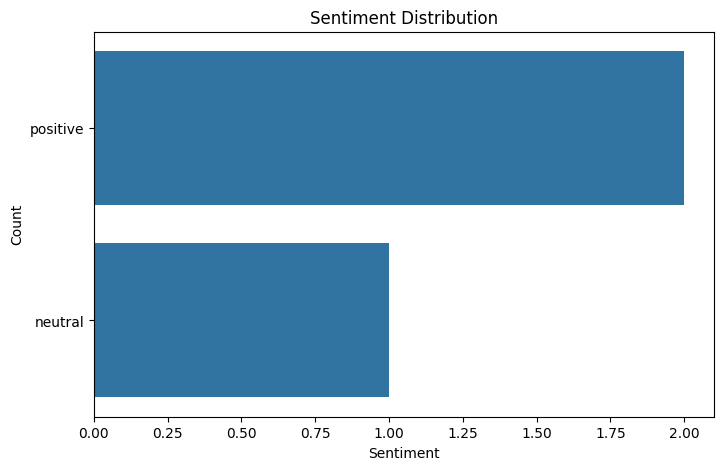

discussion_topic.discussion_type
threaded    0.083333
Name: sentiment, dtype: float64


In [98]:
plt.figure(figsize=(8, 5))
sns.countplot(df['sentiment_label'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Optional: Analyze average sentiment by discussion type
average_sentiment = df.groupby('discussion_topic.discussion_type')['sentiment'].mean()
print(average_sentiment)

In [99]:
if isinstance(data, list):
    for item in data:
        print(item)  
elif isinstance(data, dict):
    print(data['key']) 

{'discussion_topic': {'id': 1, 'title': 'The Purpose of Art', 'message': "I believe Banksy's art is a powerful way to advocate for marginalized voices. We can use it to address local immigration issues, just like he does. Street art should be a platform for activism.", 'posted_at': '2024-10-17T12:00:00Z', 'last_reply_at': '2024-10-18T12:00:00Z', 'require_initial_post': True, 'user_name': 'Ana Maria Lopez', 'user_id': 3, 'discussion_type': 'threaded', 'allow_rating': False, 'lock_at': None, 'pinned': False, 'replies': [{'id': 101, 'parent_id': None, 'user_id': 8, 'user_name': 'Maximilian Schmidt', 'message': 'While I see your point, I think Banksyâ€™s work is often more about provoking thought than providing solutions. He uses satire to challenge societal norms, but that doesnâ€™t always translate into actionable change. It can be seen as merely performative.', 'created_at': '2024-10-17T13:00:00Z', 'updated_at': None, 'deleted': False, 'rating': None}, {'id': 102, 'parent_id': 101, 'use

In [100]:
try:
    with open('hack-la-24-banksy-discussions.json', 'r') as file:
        data = json.load(file)
except FileNotFoundError:
    print("The file was not found.")
except json.JSONDecodeError:
    print("Error decoding JSON.")

In [101]:
def preprocess_text(text):
    text = text.lower() 
    text = text.translate(str.maketrans("", "", string.punctuation)) 
    return text

df['cleaned_message'] = df['discussion_topic.message'].apply(preprocess_text)

In [102]:
def summarize_text(text):
    parser = PlaintextParser.from_string(text, Tokenizer('english'))
    summarizer = TextRankSummarizer()
    summary = summarizer(parser.document, 2)  # Summarize to 2 sentences
    return ' '.join(str(sentence) for sentence in summary)

# Apply summarization
df['summary'] = df['cleaned_message'].apply(summarize_text)

In [103]:
for index, row in df.iterrows():
    print(f"Original Message: {row['discussion_topic.message']}")
    print(f"Summary: {row['summary']}")
    print("="*40)

Original Message: I believe Banksy's art is a powerful way to advocate for marginalized voices. We can use it to address local immigration issues, just like he does. Street art should be a platform for activism.
Summary: i believe banksys art is a powerful way to advocate for marginalized voices we can use it to address local immigration issues just like he does street art should be a platform for activism
Original Message: How can Banksyâ€™s depictions of women in his art challenge cultural norms and stereotypes, and what can we learn from these representations for our own work?
Summary: how can banksyâ€™s depictions of women in his art challenge cultural norms and stereotypes and what can we learn from these representations for our own work
Original Message: How can Banksyâ€™s approach to street art foster community engagement and dialogue, and what are the potential drawbacks of using this medium?
Summary: how can banksyâ€™s approach to street art foster community engagement and dia